In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

import torch
import torchvision.transforms as transforms
from models.densenet_ import DenseNet
from datasets.datahelpers import default_loader
from utils.converter import LabelConverter
from generate import gen_text_img

In [7]:
alphabet = ''
with open('alphabet/alphabet_decode_5990.txt', mode='r', encoding='utf-8') as f:
    for line in f.readlines():
        alphabet += line.strip()

In [15]:
num = 100
dev_num = num
use_file = 0
text = None
text_length = 3
font_size = 32
font_id = -1
space_width = 1
text_color = '#282828'
thread_count = 8
channel = 3

random_skew = True
skew_angle = 2
random_blur = True
blur = 0.5

orientation = 0
distorsion = -1
distorsion_orientation = 2
background = 1

random_process = True
noise = 20
erode = 1
dilate = 2
incline = 10


In [16]:
device = torch.device("cpu")
model_path = 'pretrained/new_params.pth'
model = DenseNet(num_classes=len(alphabet) + 1).to(device)
checkpoint = torch.load(model_path, map_location='cpu')
model.load_state_dict(checkpoint)
model.eval()

converter = LabelConverter(alphabet, ignore_case=False)

transform = transforms.Compose([
    transforms.Resize((32, 32*text_length)),
    transforms.ToTensor(),
])

pred strings: 你你你
pred strings: 你你
pred strings: 1你你你
pred strings: 3你你i你
pred strings: 你你你
pred strings: 你你你
pred strings: 五g你你
pred strings: 你你
pred strings: 你你五g
pred strings: 你你你你
pred strings: 你你你
pred strings: 你三三
pred strings: 你你你
pred strings: 你你你你
pred strings: 你你你
pred strings: 五你你
pred strings: 三一
pred strings: 你你你你
pred strings: 你你
pred strings: 三g你你
pred strings: 五你3三
pred strings: 你你
pred strings: 你你3你
pred strings: 3g你你
pred strings: 你你你
pred strings: 五j你你
pred strings: 你三你四
pred strings: 你你你你
pred strings: 你你
pred strings: 你你
pred strings: 你你三
pred strings: 你你你你
pred strings: 3三你你你
pred strings: 你你
pred strings: 你你你你
pred strings: 你你你
pred strings: l你你j
pred strings: 1你你你
pred strings: 你好你
pred strings: 你你
pred strings: 你你你
pred strings: 你你你
pred strings: 你你
pred strings: 你你你
pred strings: 你j你
pred strings: 你你你
pred strings: 你你g
pred strings: 你你你你
pred strings: 你你你
pred strings: 你你
pred strings: 你你
pred strings: 你你你
pred strings: 3你你你
pred strings: 你你你你
pred strings: 你五

KeyboardInterrupt: 

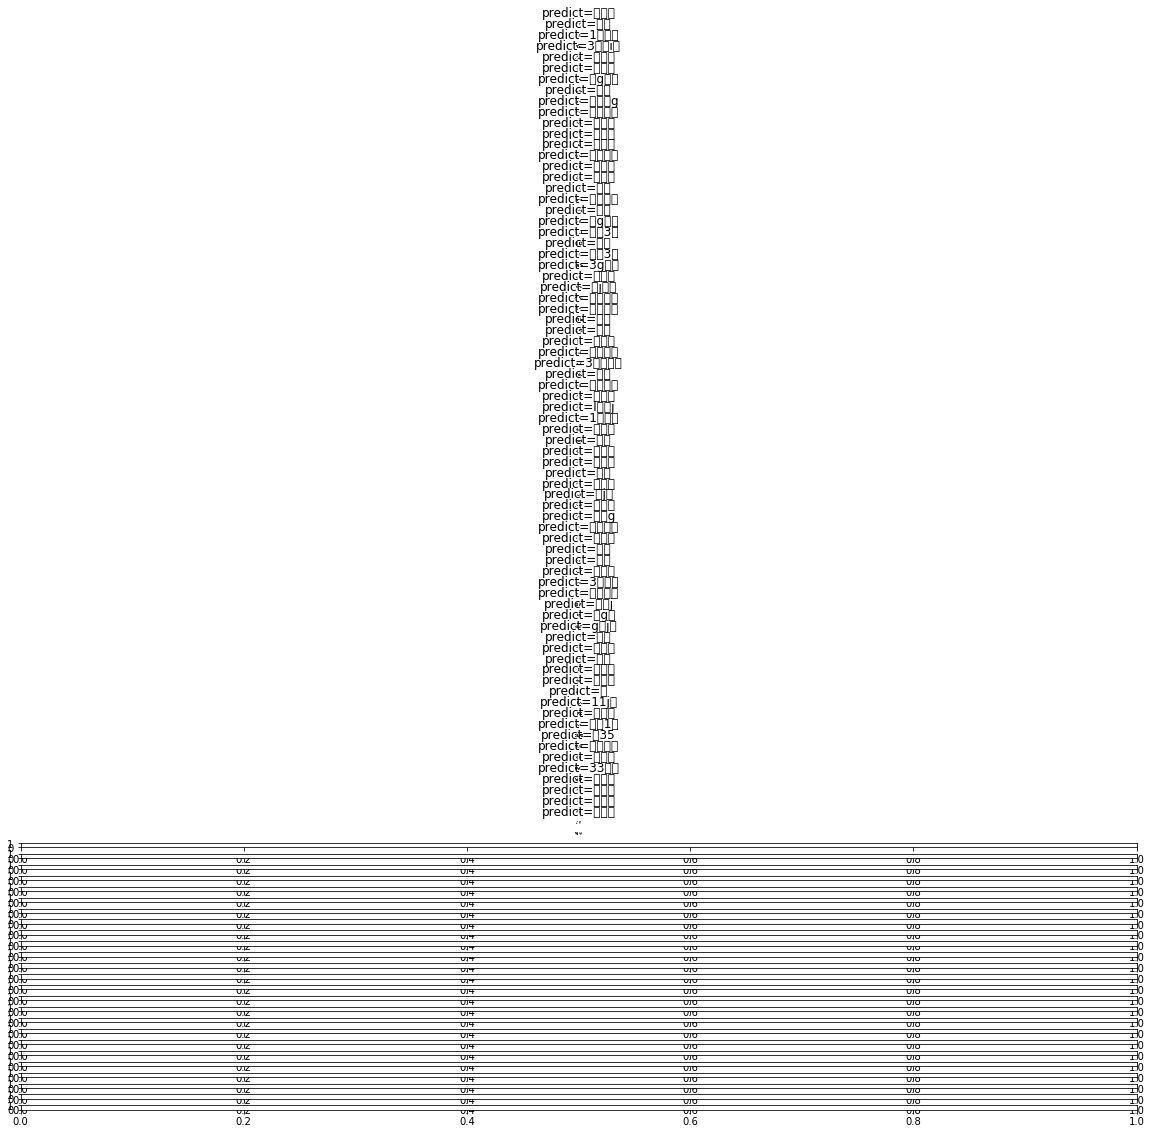

In [17]:
import numpy as np
from PIL import Image
imgs = []
figs, axs = plt.subplots(ncols = 1, nrows=num,figsize=(20,20))
plt.subplots_adjust(wspace = 0, hspace = 1.5)
df, img = gen_text_img(num, use_file, text, text_length, font_size, font_id, space_width,
                               background, text_color,
                               orientation, blur, random_blur, distorsion, distorsion_orientation,
                               skew_angle, random_skew,
                               random_process, noise, erode, dilate, incline,
                               thread_count)
base = 0
for i in range(num):
    temp = img[:,base:base+int(df.iloc[i]['img_shape']),:]
    imgs.append(Image.fromarray(temp))
    base += int(df.iloc[i]['img_shape'])
for r, (ax, img) in enumerate(zip(axs, imgs)):
    ax.axis('off')
    ax.imshow(img)
    img = img.convert("L")
    img = transform(img)
    img = np.asarray(img)
    img = torch.Tensor(img).unsqueeze(0)

    with torch.no_grad():
        log_probs = model(img)
        preds_strs = converter.best_path_decode(log_probs, strings=True).decode('utf-8')
        preds = converter.best_path_decode(log_probs, raw=True).decode('utf-8')
#         print('pred: {}'.format(preds))
        print('pred strings: {}'.format(preds_strs))
        ax.set_title(f'predict={preds_strs}')

In [18]:
df

,index,text,text_length,img_shape,font_size,font_id,skew_angle,blur,distorsion_type,background_type,num_noise,erode,dilate,incline
0,0,氅阎,2,50,32,FZKaiTi,0.0,0.40628167333676735,Sine wave,Plain white,20,0,0,0
1,8,郯角,2,47,32,FZKaiTi,0.0,0.17669133461485875,Sine wave,Plain white,0,0,1,10
2,9,票林,2,58,32,HWLiShu,-0.7692162216182389,0.18212901933479864,Sine wave,Plain white,20,2,1,0
3,10,绊渚,2,51,32,Fangsong,0.0,0.0238830746822708,None,Plain white,20,2,1,10
4,11,冲谔,2,50,32,FZKaiTi,0.0,0.03001683986622261,Sine wave,Plain white,20,0,1,0
5,12,鹦羚,2,57,32,HWLiShu,1.7546377399535178,0.4892490884606527,Cosine wave,Plain white,0,0,0,10
6,13,毡祗,2,61,32,HWLiShu,0.29752251064463797,0.3558519010341158,Cosine wave,Plain white,0,0,0,0
7,14,羞凋,2,50,32,FZKaiTi,-0.19273560348792607,0.35132101601862403,Cosine wave,Plain white,0,2,0,0
8,15,钰迪,2,54,32,Fangsong,0.0,0.3353192406617795,None,Plain white,0,0,0,0
9,16,斌滕,2,52,32,FZKaiTi,0.0,0.3631790428391053,Sine wave,Plain white,0,0,0,0
